In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.interpolate import interp1d

In [2]:
r1 = 0.04417
r2 = 0.03922
r3 = 0.03788
r5 = 0.03711
r7 = 0.03807
r10= 0.03914
r30= 0.04203

In [3]:
t = np.array([1,2,3,5,7,10,30])
spot_rate = [ r1,r2,r3,r5,r7,r10,r30 ]
interpolate = interp1d(t,spot_rate,kind='quadratic')

[0.04061435 0.04080946 0.04099011 0.0411563  0.04130803 0.0414453
 0.04156811 0.04167646 0.04177035 0.04184978 0.04191474 0.04196525
 0.04200129 0.04202288 0.04203   ]
[0.04417    0.03922    0.03788    0.03728854 0.03711    0.03748565
 0.03807    0.03851758 0.03884366 0.03914    0.03942188 0.03968929
 0.03994225 0.04018074 0.04040478 0.04061435 0.04080946 0.04099011
 0.0411563  0.04130803 0.0414453  0.04156811 0.04167646 0.04177035
 0.04184978 0.04191474 0.04196525 0.04200129 0.04202288 0.04203   ]


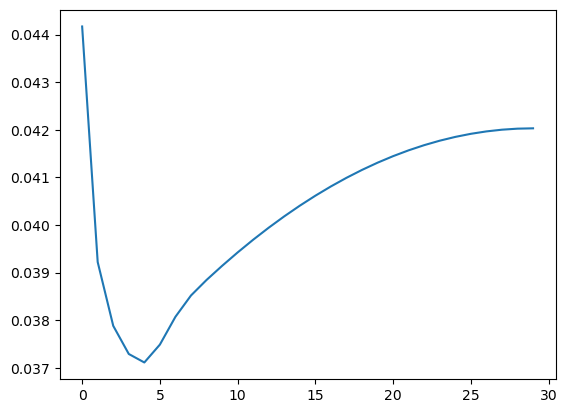

In [1223]:
time = np.arange(1,31,1)
rates = interpolate(time)
sns.lineplot(rates)
print(rates[15:30])
print(rates)

## DV01 FUNCTION FOR THE PUTTABLE BOND

In [1225]:
def Bond_Price(Face_Value,Coupon_rate,Maturity,spot_rates):
    sum_coupon_pv = 0
    terminal = 0
    for i in range(0,Maturity):
        coupon = Face_Value * Coupon_rate
        if(i<Maturity-1):
            coupon_pv = coupon/(1+spot_rates[i])**(i+1)
            sum_coupon_pv = sum_coupon_pv + coupon_pv
        else:
            terminal = (coupon + Face_Value)/(1+spot_rates[-1])**(Maturity)
        price = sum_coupon_pv + terminal
    return price    

In [4]:
def Mac_d_numerator(Face_Value,Coupon_rate,Maturity,spot_rates):
    d=0
    d1=0
    coupon = Face_Value*Coupon_rate
    for i in range(0,Maturity):
        if(i<Maturity-1):
            coupon_pv = coupon/(1+spot_rates[i])**(i+1)
            d = d + (i+1)*coupon_pv
        else:
            d1 = d1 + Maturity * (coupon + Face_Value)/(1+spot_rates[-1])**(Maturity)
        Mac_Num = d + d1  
    return Mac_Num

In [5]:
def DV01(Face_Value,Coupon_rate,Maturity,exercise_date,spot_rates):
    prices=[]
    Mac_num =[]
    DV01=[]
    for i in range(0,Maturity):
        p = Bond_Price(Face_Value,Coupon_rate,Maturity-i,spot_rates)
        prices.append(p)
    prices=np.insert(prices,exercise_date-1,Face_Value)  

    put_rates = spot_rates[exercise_date:Maturity]
    d_put = Mac_d_numerator(Face_Value,Coupon_rate,Maturity-exercise_date,put_rates)

    for j in range(0,Maturity):
        d = Mac_d_numerator(Face_Value,Coupon_rate,Maturity-j,spot_rates)
        Mac_num.append(d)
    Mac_num = np.insert(Mac_num,exercise_date-1,d_put)

    for k in range(0,Maturity):
        dv = 0.0001 * Mac_num[k]*prices[k]
        DV01.append(dv)
    return DV01

<Axes: >

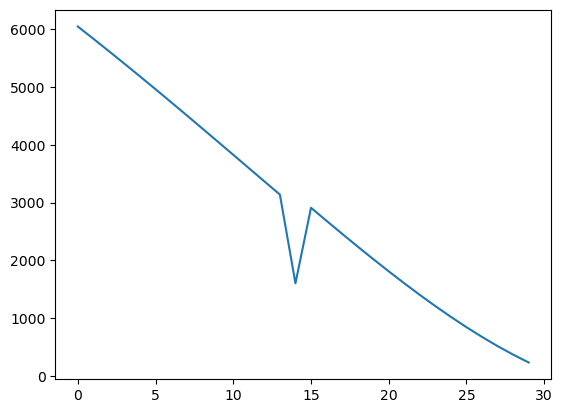

In [1228]:
d =DV01(1000,0.1,30,15,rates)
d1=pd.DataFrame(d)
d1.plot(legend=False)